## TESTING EFFICIENTNETS WITH FASTAI

Pytorch pretrained EffcientNet models from: https://github.com/lukemelas/EfficientNet-PyTorch
        
Data from https://www.kaggle.com/jutrera/stanford-car-dataset-by-classes-folder

In [29]:
import torch

#using GPU
# See how many devices are around
# torch.cuda.device_count()
# Set it to a particular device
torch.cuda.set_device(3)
# Check which device you are on
torch.cuda.current_device()


3

In [30]:
from fastai.vision import *

In [31]:
from efficientnet_pytorch import EfficientNet
# from efficientnet_pytorch.utils import Conv2dSamePadding
model = EfficientNet.from_name('efficientnet-b5')

In [32]:
model_name = 'efficientnet-b5'
image_size = EfficientNet.get_image_size(model_name)

In [33]:
image_size

456

In [34]:
model = EfficientNet.from_pretrained(model_name)

Loaded pretrained weights for efficientnet-b5


In [35]:
import pandas as pd

In [36]:
train = pd.read_csv('/home/cqiuac/EfficientNet-PyTorch-master/semi_data/tran_anno.csv', header=None)
train.head()

,0,1
0,file,label
1,0a52901a8ae9eea5ee0df9a99b093d99,0
2,52ec226c4c5c1b181fc0128d08ada447,0
3,e4d5e24abd7be58d072a26cdb6031757,0
4,8bf7f76905de67745705cf05021503c4,0


In [37]:
path = '/home/cqiuac/EfficientNet-PyTorch-master/semi_data/'

In [38]:
bs = 8

In [39]:
np.random.seed(42)
src = (ImageList.from_folder(path+'train').split_by_rand_pct(0.1).label_from_folder())

In [40]:
src

LabelLists;

Train: LabelList (27000 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
bad_1,bad_1,bad_1,bad_1,bad_1
Path: /home/cqiuac/EfficientNet-PyTorch-master/semi_data/train;

Valid: LabelList (3000 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
bad_1,good_0,good_0,good_0,bad_1
Path: /home/cqiuac/EfficientNet-PyTorch-master/semi_data/train;

Test: None

In [41]:
src.classes[1]

'good_0'

In [42]:
tfms = get_transforms(do_flip=True,
                      flip_vert=True,
                      max_rotate=360,
                      max_zoom=1.3,
                      p_affine=0.5
                      )


In [43]:
data = (src.transform(tfms, size=224, resize_method=ResizeMethod.SQUISH)
        .databunch(bs=bs).normalize(imagenet_stats))

In [44]:
data

ImageDataBunch;

Train: LabelList (27000 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
bad_1,bad_1,bad_1,bad_1,bad_1
Path: /home/cqiuac/EfficientNet-PyTorch-master/semi_data/train;

Valid: LabelList (3000 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
bad_1,good_0,good_0,good_0,bad_1
Path: /home/cqiuac/EfficientNet-PyTorch-master/semi_data/train;

Test: None

In [45]:
data.classes, data.c, len(data.train_ds), len(data.valid_ds)

(['bad_1', 'good_0'], 2, 27000, 3000)

In [46]:
list(children(model))[-2:]

[Linear(in_features=2048, out_features=1000, bias=True),
 MemoryEfficientSwish()]

In [47]:
# model

In [48]:
newmodel = model

In [49]:
newmodel

EfficientNet(
  (_conv_stem): Conv2dStaticSamePadding(
    3, 48, kernel_size=(3, 3), stride=(2, 2), bias=False
    (static_padding): ZeroPad2d(padding=(0, 1, 0, 1), value=0.0)
  )
  (_bn0): BatchNorm2d(48, eps=0.001, momentum=0.010000000000000009, affine=True, track_running_stats=True)
  (_blocks): ModuleList(
    (0): MBConvBlock(
      (_depthwise_conv): Conv2dStaticSamePadding(
        48, 48, kernel_size=(3, 3), stride=[1, 1], groups=48, bias=False
        (static_padding): ZeroPad2d(padding=(1, 1, 1, 1), value=0.0)
      )
      (_bn1): BatchNorm2d(48, eps=0.001, momentum=0.010000000000000009, affine=True, track_running_stats=True)
      (_se_reduce): Conv2dStaticSamePadding(
        48, 12, kernel_size=(1, 1), stride=(1, 1)
        (static_padding): Identity()
      )
      (_se_expand): Conv2dStaticSamePadding(
        12, 48, kernel_size=(1, 1), stride=(1, 1)
        (static_padding): Identity()
      )
      (_project_conv): Conv2dStaticSamePadding(
        48, 24, kernel_siz

In [50]:
newmodel.add_module('_fc',nn.Linear(2048, 2))

In [51]:
newmodel

EfficientNet(
  (_conv_stem): Conv2dStaticSamePadding(
    3, 48, kernel_size=(3, 3), stride=(2, 2), bias=False
    (static_padding): ZeroPad2d(padding=(0, 1, 0, 1), value=0.0)
  )
  (_bn0): BatchNorm2d(48, eps=0.001, momentum=0.010000000000000009, affine=True, track_running_stats=True)
  (_blocks): ModuleList(
    (0): MBConvBlock(
      (_depthwise_conv): Conv2dStaticSamePadding(
        48, 48, kernel_size=(3, 3), stride=[1, 1], groups=48, bias=False
        (static_padding): ZeroPad2d(padding=(1, 1, 1, 1), value=0.0)
      )
      (_bn1): BatchNorm2d(48, eps=0.001, momentum=0.010000000000000009, affine=True, track_running_stats=True)
      (_se_reduce): Conv2dStaticSamePadding(
        48, 12, kernel_size=(1, 1), stride=(1, 1)
        (static_padding): Identity()
      )
      (_se_expand): Conv2dStaticSamePadding(
        12, 48, kernel_size=(1, 1), stride=(1, 1)
        (static_padding): Identity()
      )
      (_project_conv): Conv2dStaticSamePadding(
        48, 24, kernel_siz

In [52]:
loss_func = nn.CrossEntropyLoss()

In [53]:
# RMSprop = partial(torch.optim.RMSprop)

from ranger import Ranger

In [54]:
import torch
from torch.optim import Optimizer

In [55]:
# learn = Learner(data, newmodel, loss_func=loss_func, metrics=[accuracy], opt_func=RMSprop,model_dir='/home/cqiuac/EfficientNet-PyTorch-master/models')
learn = Learner(data, newmodel, loss_func=loss_func, metrics=[accuracy,AUROC()], opt_func=Ranger,model_dir='/home/cqiuac/EfficientNet-PyTorch-master/models')

In [56]:
learn

Learner(data=ImageDataBunch;

Train: LabelList (27000 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
bad_1,bad_1,bad_1,bad_1,bad_1
Path: /home/cqiuac/EfficientNet-PyTorch-master/semi_data/train;

Valid: LabelList (3000 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
bad_1,good_0,good_0,good_0,bad_1
Path: /home/cqiuac/EfficientNet-PyTorch-master/semi_data/train;

Test: None, model=EfficientNet(
  (_conv_stem): Conv2dStaticSamePadding(
    3, 48, kernel_size=(3, 3), stride=(2, 2), bias=False
    (static_padding): ZeroPad2d(padding=(0, 1, 0, 1), value=0.0)
  )
  (_bn0): BatchNorm2d(48, eps=0.001, momentum=0.010000000000000009, affine=True, track_running_stats=True)
  (_blocks): ModuleList(
    (0): MBConvBlock(
      (_depthwise_conv): Conv2dStaticSamePadding(
        48, 48, kernel_size=(3, 3), stride=[1, 1], grou

In [59]:
learn.model

EfficientNet(
  (_conv_stem): Conv2dStaticSamePadding(
    3, 48, kernel_size=(3, 3), stride=(2, 2), bias=False
    (static_padding): ZeroPad2d(padding=(0, 1, 0, 1), value=0.0)
  )
  (_bn0): BatchNorm2d(48, eps=0.001, momentum=0.010000000000000009, affine=True, track_running_stats=True)
  (_blocks): ModuleList(
    (0): MBConvBlock(
      (_depthwise_conv): Conv2dStaticSamePadding(
        48, 48, kernel_size=(3, 3), stride=[1, 1], groups=48, bias=False
        (static_padding): ZeroPad2d(padding=(1, 1, 1, 1), value=0.0)
      )
      (_bn1): BatchNorm2d(48, eps=0.001, momentum=0.010000000000000009, affine=True, track_running_stats=True)
      (_se_reduce): Conv2dStaticSamePadding(
        48, 12, kernel_size=(1, 1), stride=(1, 1)
        (static_padding): Identity()
      )
      (_se_expand): Conv2dStaticSamePadding(
        12, 48, kernel_size=(1, 1), stride=(1, 1)
        (static_padding): Identity()
      )
      (_project_conv): Conv2dStaticSamePadding(
        48, 24, kernel_siz

In [60]:
learn.split([[learn.model._conv_stem, learn.model._bn0, learn.model._blocks[:12]],
             [learn.model._blocks[12:],learn.model._conv_head], 
             [learn.model._bn1,learn.model._fc]])

Learner(data=ImageDataBunch;

Train: LabelList (27000 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
bad_1,bad_1,bad_1,bad_1,bad_1
Path: /home/cqiuac/EfficientNet-PyTorch-master/semi_data/train;

Valid: LabelList (3000 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
bad_1,good_0,good_0,good_0,bad_1
Path: /home/cqiuac/EfficientNet-PyTorch-master/semi_data/train;

Test: None, model=EfficientNet(
  (_conv_stem): Conv2dStaticSamePadding(
    3, 48, kernel_size=(3, 3), stride=(2, 2), bias=False
    (static_padding): ZeroPad2d(padding=(0, 1, 0, 1), value=0.0)
  )
  (_bn0): BatchNorm2d(48, eps=0.001, momentum=0.010000000000000009, affine=True, track_running_stats=True)
  (_blocks): ModuleList(
    (0): MBConvBlock(
      (_depthwise_conv): Conv2dStaticSamePadding(
        48, 48, kernel_size=(3, 3), stride=[1, 1], grou

In [61]:
learn.load('/home/cqiuac/EfficientNet-PyTorch-master/models/b5_6_0.974')

Learner(data=ImageDataBunch;

Train: LabelList (27000 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
bad_1,bad_1,bad_1,bad_1,bad_1
Path: /home/cqiuac/EfficientNet-PyTorch-master/semi_data/train;

Valid: LabelList (3000 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
bad_1,good_0,good_0,good_0,bad_1
Path: /home/cqiuac/EfficientNet-PyTorch-master/semi_data/train;

Test: None, model=EfficientNet(
  (_conv_stem): Conv2dStaticSamePadding(
    3, 48, kernel_size=(3, 3), stride=(2, 2), bias=False
    (static_padding): ZeroPad2d(padding=(0, 1, 0, 1), value=0.0)
  )
  (_bn0): BatchNorm2d(48, eps=0.001, momentum=0.010000000000000009, affine=True, track_running_stats=True)
  (_blocks): ModuleList(
    (0): MBConvBlock(
      (_depthwise_conv): Conv2dStaticSamePadding(
        48, 48, kernel_size=(3, 3), stride=[1, 1], grou

epoch,train_loss,valid_loss,accuracy,auroc,time


set state called
LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.
Min numerical gradient: 1.58E+00
Min loss divided by 10: 8.32E-03


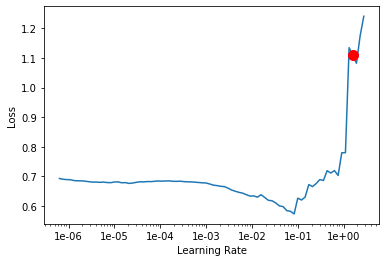

In [35]:
learn.lr_find()
learn.recorder.plot(suggestion=True)

In [62]:
from fastai.callbacks import *

In [63]:
callbacks = [
        OverSamplingCallback(learn),
        SaveModelCallback(learn, every='epoch', monitor='roc_score', name='b5')
    ]

In [38]:
# lr=1.32E-02
learn.fit_one_cycle(10,callbacks = callbacks)


epoch,train_loss,valid_loss,accuracy,auroc,time
0,0.251548,0.244493,0.903000,0.964979,19:20
1,0.235128,0.122558,0.970333,0.952738,25:16
2,0.279781,0.139146,0.959333,0.911201,26:05
3,0.199519,0.122998,0.969000,0.963661,27:35
4,0.160240,0.104361,0.974667,0.961227,27:19
5,0.140770,0.119987,0.966333,0.969393,29:05
6,0.139317,0.116151,0.961000,0.974274,23:08
7,0.120406,0.097362,0.975000,0.969568,21:32
8,0.086613,0.087136,0.974333,0.973397,29:21
9,0.085842,0.092997,0.973667,0.972184,29:23


In [ ]:
learn.export('/home/cqiuac/EfficientNet-PyTorch-master/models/01101607')

In [ ]:
learn.recorder.plot_losses()

In [70]:
# learn.save('/home/cqiuac/EfficientNet-PyTorch-master/models/oversample20')

epoch,train_loss,valid_loss,accuracy,auroc,time


set state called
LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.
Min numerical gradient: 2.29E-06
Min loss divided by 10: 6.31E-04


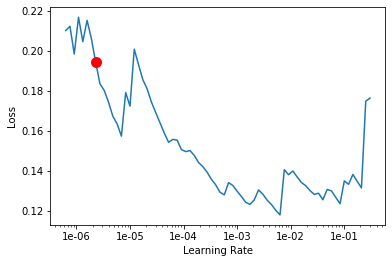

In [64]:
learn.unfreeze()
learn.lr_find()
learn.recorder.plot(suggestion=True)


In [65]:
lr=1e-2
learn.fit_one_cycle(15,max_lr=slice(1e-6,1e-5),callbacks = callbacks) #bs=8

epoch,train_loss,valid_loss,accuracy,auroc,time
0,0.109809,0.119551,0.960333,0.974472,20:16
1,0.140125,0.107565,0.966000,0.974631,20:20
2,0.107206,0.103155,0.968667,0.975144,20:29
3,0.129757,0.099822,0.972333,0.975288,20:22
4,0.133381,0.098711,0.972000,0.975438,20:31
5,0.141634,0.096150,0.972667,0.975560,20:42
6,0.075655,0.094779,0.973333,0.975549,20:39
7,0.114534,0.096210,0.973333,0.975539,20:36
8,0.121317,0.095991,0.972667,0.975460,20:35
9,0.096091,0.097208,0.972000,0.975483,20:36


## TEST

In [34]:
np.random.seed(42)
path='/home/cqiuac/EfficientNet-PyTorch-master/semi_data/'
test_data = ImageList.from_folder(path+'test')
data.add_test(test_data)
print(data)

ImageDataBunch;

Train: LabelList (27000 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
bad_1,bad_1,bad_1,bad_1,bad_1
Path: /home/cqiuac/EfficientNet-PyTorch-master/semi_data/train;

Valid: LabelList (3000 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
bad_1,good_0,good_0,good_0,bad_1
Path: /home/cqiuac/EfficientNet-PyTorch-master/semi_data/train;

Test: LabelList (3000 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: EmptyLabelList
,,,,
Path: /home/cqiuac/EfficientNet-PyTorch-master/semi_data/train


In [37]:
predictions, *_ = learn.get_preds(DatasetType.Test)
thresh = 0.2
labelled_preds = [' '.join([learn.data.classes[i] for i,p in enumerate(pred) if p > thresh]) for pred in predictions]
# labels = np.argmax(predictions, 1)
print(labelled_preds[:5])
label=[x[-1:] for x in labelled_preds]
print(label[:5]).t
predictions

tensor([[0.9956, 0.0044],
        [0.0273, 0.9727],
        [0.0069, 0.9931],
        ...,
        [0.0290, 0.9710],
        [0.0100, 0.9900],
        [0.0035, 0.9965]])

In [38]:
import numpy as np  
n = predictions.numpy()
n

array([[0.995611, 0.004389],
       [0.02726 , 0.97274 ],
       [0.00686 , 0.99314 ],
       [0.189824, 0.810176],
       ...,
       [0.008388, 0.991612],
       [0.02901 , 0.97099 ],
       [0.009962, 0.990039],
       [0.003539, 0.996461]], dtype=float32)

In [40]:
import pandas as pd
 
df = pd.DataFrame(n)
df.columns=['label0','label1']
df

,label0,label1
0,0.995611,0.004389
1,0.027260,0.972740
2,0.006860,0.993140
3,0.189824,0.810176
4,0.997259,0.002741
...,...,...
2995,0.005290,0.994710
2996,0.008388,0.991612
2997,0.029010,0.970990
2998,0.009962,0.990039


In [126]:
fnames=[f.name.split('/')[-1][:-4] for f in learn.data.test_ds.items]
# fnames = [f.name[:-4] for f in learn.data.test_ds.items]


# output to a file
submission_df = pd.DataFrame({'id': fnames, 'label': label })
submission_df.to_csv('/home/cqiuac/EfficientNet-PyTorch-master/submissionb30110.csv', index=False)